<a href="https://colab.research.google.com/github/nazmul-kaonine/UTS_ML2019_ID13300912/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Practical Machine Learning Project
##32513 - Machine Learning Spring 2019 
###Nazmul Kaonine - 13300912
###Omkar Dhamal - 13073921

Links:
Report:https://github.com/nazmul-kaonine/UTS_ML2019_ID13300912/blob/master/A2.ipynb

Full Code:

CSV File (more than 25 mb so not supported in github):
https://drive.google.com/open?id=1whpphl7iN9dyKWDAG239Our_kV61YsD3


##Section 1: Introduction

It is predicted that the world population will reach 9.7 billion by the end of 2050 (i.e. 30% increase to compared to current population which is 7.7 billion). It took 200,000 years for humans to reach the population of 1 billion and only one century to reach 7 Billion. This means that the food consumption will be increasing rapidly too. Moreover, the population is expected to increase in developed locations rather than regional, which implies that there will be more demand for fast food or meat-based products than regional staple food. (https://www.sciencedirect.com/science/article/pii/S0092867415003062)


More than 50 percent of daily human calories come from Rice, maize, barley etc. and to produce one kilogram of meat it takes around 10kg of feed. This indicates that there will be massive rise in food consumption. Currently the world is suffering from food crisis and the reason behind it is improper crop cultivation which leads to shortage of one crop and other ends up in surplus. This needs to be uniform depending on the consumption of every country. (https://www.kaggle.com/mariammohamed/simple-data-exploration/data)

Based on past 50 years data, crop production for the future years can be predicted using various prediction models. This in turn can help to regulate the crop production in every country depending on its consumption and can also reduce the selective food shortage.    
For the prediction of optimal crop production we have used FAO crop production data as the input. Additionally, the prediction is specific to the item (crop) produced and the element (e.g. yield) produced. To make things more specific, our model will also give crop production levels specific to the area (country). 

##Section 2: Exploration

###Data Description
The data set has 49,370 rows and 64 columns without flags and 121 with flagged data for each year.
The dataset contains the following data to be used as inputs related to food production; a detailed description of the attributes is given below.

•	Area code – Code associated with each country

•	Area – Name of the country, the dataset consists of 258 countries in total.

•	Item – Crop name 

•	Element – Area harvested, Yield and Production

•	Unit - The Area harvested is displayed in hectares (ha), Production is in tonnes i.e. 1000kg and Yield is depicted as hectograms per hectare (hg/ha).

•	Year – This column presents the total of every element in each country for each item from years 1961 to 2017

•	Flags – The flags in this column represent whether the data is official (), unofficial (*), FAO Estimate (F), calculated (Fc), aggregated (A) or not available (M). But in this analysis report we have ignored the flags and have assumed all provided values as reliable values.

The ouput is simply saying if the specific item or food will be produced in optimal amounts for that country in that year.
By optimal, we take the average amount of each item per element over 56 years. If the amount produced is greater than or equal to the average value, the amount produced is considered to be optimum. Ofcourse, No input data of the amount is taken in the testing set.
###Data Exploration:

The libraries are imported and tested. The dataset was uploaded in correct forma to colab from the local drive. The following piece of code shows the importing process.





## Section 2.1: Initializing

In [0]:
#Importing all Libraries needed
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
import matplotlib
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from IPython.display import display, HTML
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [0]:
#Changing scientific values to number
pd.options.display.float_format = '{:.2f}'.format


In [0]:
#Checking if matlib & numpy libraries have been called
plt.plot(np.arange(5))

## Importing the NOFLAG Food Production Dataset
We are assuming that the data provided is reliable and the flags are outweighed by its existence in case of unofficial & previous year flags

In [9]:
#Importing from local drive
from google.colab import files
uploaded = files.upload()

Saving Production_Crops_E_All_Data_NOFLAG.csv to Production_Crops_E_All_Data_NOFLAG (1).csv


In [0]:
#storing in pandas dataframe in latin-1 encoding to make it readable in dataframe (not utf-8)
import io
df=pd.read_csv('Production_Crops_E_All_Data_NOFLAG (1).csv',encoding='latin-1')
# Dataset is now stored in a Pandas Dataframe

##Section 2.2: INITIAL DATA EXPLORATION
The data is explored in various ways in the following codes and the structure is made familiar. The length  of unique values are measured. e.g. the data shows a number of 258 countries. The number of rows and columns in the data, the max,min, mean and standard deviation values along with data types are also derived. The barplots shows the size of each element and items inside the dataset. The item barplot is very unorganized and therefore we move on to data preprocessing.

In [65]:
#lets look at the structure of the data
df.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,5900.00,6000.00,6000.00,6000.00,5800.00,5800.00,5800.00,5700.00,5700.00,5600.00,5500.00,5500.00,5400.00,5400.00,6037.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,7000.00,9000.00,5500.00,5700.00,12000.00,11768.00,12000.00,12000.00,12000.00,11029.00,11210.00,13469.00,13490.00,14114.00,13703.00,14676.00,19481.00,19793.00
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,16610.00,15000.00,20000.00,17500.00,17069.00,13793.00,18966.00,17018.00,18421.00,16071.00,18182.00,16364.00,16667.00,16296.00,15736.00,16364.00,18000.00,16364.00,16364.00,16364.00,16364.00,16364.00,16364.00,20000.00,17143.00,16667.00,21407.00,24561.00,12250.00,13281.00,16667.00,26234.00,35000.00,39154.00,49955.00,45000.00,45960.00,29910.00,19996.00,16521.00,16859.00,13788.00
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,9800.00,9000.00,12000.00,10500.00,9900.00,8000.00,11000.00,9700.00,10500.00,9000.00,10000.00,9000.00,9000.00,8800.00,9500.00,9000.00,9900.00,9000.00,9000.00,9000.00,9000.00,9000.00,9000.00,11000.00,12000.00,15000.00,11774.00,14000.00,14700.00,15630.00,20000.00,31481.00,42000.00,43183.00,56000.00,60611.00,62000.00,42215.00,27400.00,24246.00,32843.00,27291.00
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,700.00,700.00,300.00,1100.00,1300.00,1882.00,700.00,2270.00,2871.00,3000.00,7000.00,4000.00,12000.00,11311.00,4000.00,1600.00,3300.00,6800.00,15000.00,16000.00,17432.00,28000.00,15000.00,17748.00,17000.00,19500.00,18500.00,18500.00,30000.00,25000.00,26019.00,28873.00
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7143.00,7143.00,6667.00,7273.00,7692.00,7072.00,7143.00,6854.00,6761.00,6667.00,6000.00,6250.00,5917.00,6189.00,6250.00,6250.00,6061.00,6029.00,6000.00,6250.00,6222.00,6071.00,6000.00,6203.00,6000.00,6414.00,6757.00,6757.00,7167.00,7200.00,6923.00,6830.00


In [0]:
df.tail()

In [0]:
#getting count,mean standard deviation and max values of each numerical column (specially years)
df.describe()

In [0]:
#Lets check the data shape (4937 rows and64 columns)
df.shape

In [0]:
#data types
df.info()

In [73]:
#number of countries in the data
len(df['Area'].unique())

258

In [0]:
# list of nonrepeated items
df['Item'].unique()

In [0]:
#number of items
len(df['Item'].unique())

In [0]:
#Number of times Items were in focus
df['Item'].value_counts()

In [0]:
#Lets draw a barplot of the three elements and see how they compare to each other
el_size = df.groupby('Element').agg('size')

In [0]:
el_size.values

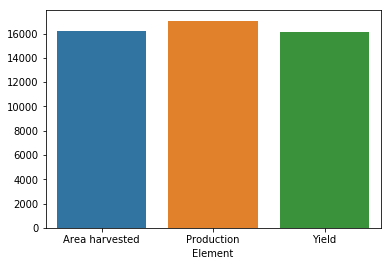

In [70]:
sns.barplot(el_size.index, el_size.values)
plt.show()

In [0]:
#lets do the same with the items
item_size = df.groupby('Item').agg('size')

In [0]:
item_size.values

In [0]:
sns.barplot(item_size.index, item_size.values)
plt.show()

In [0]:
 df.head(5)

This is by no means clear. So lets do some data preprocessing.

##Section 2.3: DATA PREPROCESSING

In this section, the missing values are cleaned, and an aggregate of the values over 56 years of each item is calculated in a separate column. This is done to see which item has been harvested, yielded and produced the most. Since there are a lot of haphazard year columns we put it in a single column. Additionally, all elements are transformed to numerical values (one-hot values) and spread out into 3 columns. The "Y" character that remained inside the values has also been removed to ensure cleansing. Furthermore, Sum Years that was previously calculated has been normalized as it contains large values. This is done so that its effect in the model does not dominate over the other inputs. Finally, the mean values are derived for each element over the years for every country. Each and every amount of food is then compared to its corresponding mean values (optimal value). If amount is greated than or equal to mean then the corresponding output 'Y' is '1'. Otherwise, its '0'. We also keep a watch for the outliers.

In [0]:
#Lets check out the missing values
df.isna().sum()

In [0]:
df=df.dropna()

In [39]:
df.shape

(29876, 65)

Lets make another column which is the aggregate of all amounts from every year and lets look at what the biggest item that has been produced.

In [0]:
#Lets see the total elements of each item from 1961 to 2017
df['Sum Years'] = 0
for year in range(1961, 2017):
    col = 'Y' + str(year)
    df['Sum Years'] = df['Sum Years'] + df[col]

In [0]:
df.head(5)

In [0]:
#Transforming all year columns to a single column
df1= pd.melt(df, id_vars=["Area Code","Area","Item Code","Item","Element Code", "Element", "Unit", "Sum Years"], 
...         var_name="Year", value_name="Amount")

In [0]:
df1.tail(5)

This is where we put the yield, harvest & production elements from Elements column into columns of their own with 0 or 1 values. (Good for data modelling)

In [0]:
element=df1.pop('Element')

In [0]:
df1['Area harvested']=(element=='Area harvested')*1.0
df1['Production']=(element=='Production')*1.0
df1['Yield']=(element=='Yield')*1.0

In [0]:
df1.head(5)

In [0]:
# lets remove the extra Y from the Year column
df1['Year'] = df1['Year'].map(lambda x: x.lstrip('Y').rstrip('aAbBcC'))

The amount data has been checked for outliers.

In [0]:
#now, lets normalize the big values such as Sum Years to ensure equal contribution to our model
cols_to_norm = ['Sum Years']
df1[cols_to_norm] = df1[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [0]:
df1.tail(5)

In [0]:
#lets find out the mean values of each item by year
df1['mean']=df1.groupby(['Item Code','Element Code','Area'])['Amount'].transform('mean')


In [0]:
#Creating the Final Y column which denotes if amount is optimal or not.
#Amount is optimal if its greater than mean.
df1['Y'] = np.where(df1['Amount']>=df1['mean'], '1', '0')


In [0]:
#Now that we have the Optimal values, we predict if the amount is going to be optimal for the unknown
df1.head(5)

##Section 3: Methodology

In the data modeling process, we first inspect the data as a pairplot and start with a basic K-Nearest Neighbor Classifier. We move on to a decision tree algorithm and we finish off with the random forest classifier.

First we divide the data in a training and test set with specific parameters. The training set is given 70% of the data whereas the test set is given 30%. Afterwards, we move on to importing sckitlearn to call the K-Nearest Neighbor classifier. In this way we can call the function and implement the algorithm successfully into our data.

But first, we selected the optimal features that we want to pass through the model. We have selected the neumerical values of Year, Area Code, Item Code, Sum Years and Amount. The year gives a better understanding of the changes during every year and KNN can choose its nearest neighbor more faithfully as it highly depends on the objects close to it..

The Area Code gives an understanding of the area the crop is more abundant in to the classifier. The item code talks simple about the item being produced which is mandatory for differentiating. Sum Years gives a view of the total amount derived over the years and gives the classifieers a tendency of choosing the highest regarded total. The amount is also beneficial as a criteria since this is closely related to Final Y. The parameters for KNN here are: leaf size= 30,n_neighbors=5, p=2, weights='uniform'.

For the decision tree algorithm, the tree branches out between the years values, the item codes, the area codes, the sum year values and the amounts. The path can be chosen inside the tree to predict the unknown. The parameter for the decision tree is put in a loop for optimization between 2 to 20 since decision trees are mostly about making way through the branches.

Finally, random forest provides an ensemble of decision trees thus is expected to give a higher accuracy. A multitude of decision trees using our selected parameters is also tested without using th 'Amount' and the 'Y' values. The number of n estimators have been calculated. (n_estimators=30)

In [0]:
#lets try a predictive model one but first lets inspect the data
sns.pairplot(df1[["Year","Area Code","Item Code","Sum Years","Amount"]], diag_kind="kde")
plt.show()

##K-Nearest Neighbor

In [0]:
df1.info()

In [0]:
X=df1[['Area Code','Item Code','Sum Years','Element Code','Amount']]
Y=df1['Y']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [0]:
knn=KNeighborsClassifier()

In [90]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
knn.score(X_test,y_test)

0.7882522613938783

##Accuracy is 78.82% for KNN

##Decision Tree Classifier

In [0]:
features = ['Year','Area Code','Item Code','Sum Years','Element Code','Amount'] 

In [0]:
X = df1[features].copy()
y = df1['Y'].copy()

In [0]:
X = pd.get_dummies(X)

In [0]:
first_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X = pd.DataFrame(first_imputer.fit_transform(X))

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1,test_size=0.30)

In [98]:
def AccuracyTracker(Xtrain,Xtest,ytrain,ytest,n):
    model = DecisionTreeClassifier(max_leaf_nodes=n,random_state=1)
    model.fit(Xtrain,ytrain)
    print(n,accuracy_score(ytest,model.predict(Xtest)))
    predictionDTC=model.predict(Xtest)
for i in range(2,20):
    AccuracyTracker(Xtrain,Xtest,ytrain,ytest,i)

2 0.7160429063576573
3 0.7160429063576573
4 0.7160429063576573
5 0.7482168023802067
6 0.7482168023802067
7 0.7570623238333856
8 0.7605191042906357
9 0.7605191042906357
10 0.7605191042906357
11 0.7611219855934858
12 0.7699968681490761


KeyboardInterrupt: ignored

In [0]:
confusion_matrix(ytest, Xtest)
print(classification_report(ytest,Xtest))

Accuracy is maximum 76.11 for n=11

##Using the same upper values the Random Forest Classifier gives an accuracy of 93.55%

In [99]:
model = RandomForestClassifier(n_estimators=30)
model.fit(Xtrain,ytrain)
accuracy_score(ytest,model.predict(Xtest))

0.9355621672408393

##Section 4: Evaluation
After choosing the relevant parameters,the algorithms were implemented and the data models were put through its learning phase using 70% of the dataset. Then the rest of the 30% of the reserved test set wast put through the algorithm.
After all the models have been tested in accordance to its test sets, the results suggest a clear winner. The means of evaluating the classifiers are accuracy, classification report which gives the precision and f1-score. The f1-score is highly significant in choosing the best model. Nevertheless, KNN produced 78.82% of right classification as depicted by its accuracy. Decision trees at n=11 gave an accuracy of 76.11. But Random Forest clearly made the mark by giving a 93.56% of correctly predicted results. In addition to this,
It is faster to train than decision trees because we are working only on a subset of features in this model. We can easily work with hundreds of features. Prediction speed is significantly faster than training speed because we can save generated forests for future uses.
Whereas KNN came second to Random Forest and Decision Trees made the last position, Random Forest proved to be an outstanding algorithm to predict food production datasets.

##Section 6: Ethics
Data analysis raises various ethical issues, particularly as organizations start using their information for supervenient purposes other than the relation to those for which the information was gathered at first. There are a few principals that need to be followed while forecasting or predicting data.
1.	Private information and identity ought to stay private. 
2.	Common private data ought to be dealt with confidentiality. 
3.	Clients ought to have a straightforward perspective on how their information is being utilized or sold. 
4.	Big Data should not meddle with human will: Big data analysis can direct and even figure out who we are before we make up our own personalities. 

The following are a few approaches which can be used to check if the prediction we are presenting is ethical or not.
1.	The Utilitarian Approach:  This approach is based on the concept of “Happiness or Pleasure”. According to this approach, if sacrificing one good for the happiness of others is acceptable. For food data prediction we forecast if the production of a particular crop is optimal or not. If it is not optimal then the farmers can be advised to grow the crop which is in deficit. 
But the primary problem arises when the farmer doesn’t want to grow the crop in deficit. Consider a farmer has been growing cereals but suddenly, he is asked to grow Apples. Implementing the action of requesting farmers to grow another crop is acceptable in utilitarian approach as it is good for the larger population. But practically forcing farmers is not possible.
2.	The Duty based approach or the Kant approach: According to this approach, making the wisest decision isn't about the outcomes of our activities but it is about having the best possible intension in dispensing out the activity. The Food prediction can be considered ethical because it clearly follows this approach, the intension of forecasting the values of the food production is helpful as it can solve the problem of food crisis and also, it will be beneficial for a country as it can reduce its import liabilities. Since, this intension is positive the food production data forecasting can be considered ethical.